In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy import stats

In [2]:
raw_data = pd.read_csv("data.csv")

In [3]:
exp_group = raw_data[raw_data["slot"] == 'exp']
control_group = raw_data[raw_data["slot"] == 'control']
print(exp_group.shape)
print(control_group.shape)

(281580, 6)
(284554, 6)


In [4]:
print(f"{100 * (sum(exp_group['n_clicks']) - sum(control_group['n_clicks'])) / sum(control_group['n_clicks']):.3f}")

def get_bootstrap_interval(sample, n_samples):
    indices = np.random.randint(0, len(sample), size=(n_samples, len(sample)))
    samples = sample[indices]
    return samples

def stat_quantile(stat, alpha=.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

delta_means = list(map(lambda x: x[1] - x[0], zip(list(map(np.mean, get_bootstrap_interval(exp_group['n_clicks'].values, 1000))), list(map(np.mean, get_bootstrap_interval(control_group['n_clicks'].values, 1000))))))

1.614


In [13]:
print('Разница средних')
print(stat_quantile(delta_means))

delta_medians = list(map(lambda x: x[1] - x[0], zip(list(map(np.median, get_bootstrap_interval(exp_group['n_clicks'].values, 1000))), list(map(np.median, get_bootstrap_interval(control_group['n_clicks'].values, 1000))))))

Разница средних
[-0.40621133 -0.20043295]


In [12]:
print('Разница медиан')
stat_quantile(delta_medians)

Разница медиан


array([-1., -1.])

(array([1.87033e+05, 4.38090e+04, 1.87130e+04, 1.22900e+04, 7.21500e+03,
        4.23500e+03, 3.17500e+03, 2.07100e+03, 1.34200e+03, 1.07800e+03,
        7.70000e+02, 5.85000e+02, 4.90000e+02, 3.08000e+02, 2.62000e+02,
        2.14000e+02, 1.43000e+02, 1.24000e+02, 1.14000e+02, 8.60000e+01,
        8.90000e+01, 4.30000e+01, 6.50000e+01, 4.70000e+01, 2.70000e+01,
        3.90000e+01, 2.30000e+01, 2.00000e+01, 1.50000e+01, 1.00000e+01,
        1.50000e+01, 1.50000e+01, 6.00000e+00, 1.30000e+01, 1.20000e+01,
        9.00000e+00, 3.00000e+00, 4.00000e+00, 6.00000e+00, 3.00000e+00,
        2.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 4.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00,
        3.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00

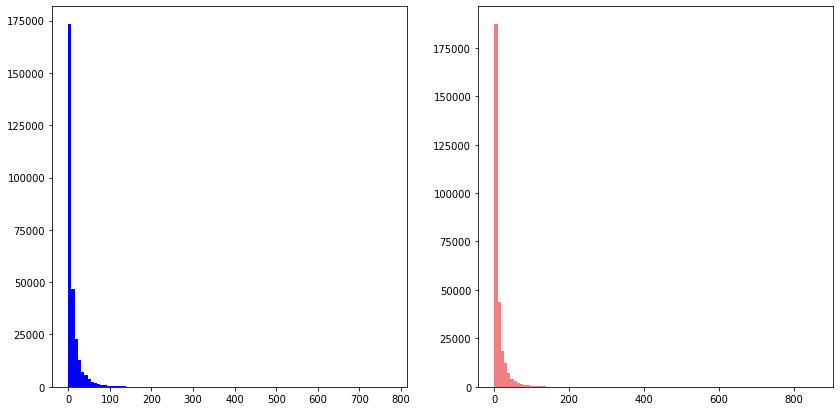

In [16]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(exp_group.n_clicks, color='blue', bins=100)
plt.subplot(1,2,2)
plt.hist(control_group.n_clicks, color='lightcoral', bins=100)

In [19]:
control_samples = get_bootstrap_interval(control_group.n_clicks.values, 500)

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

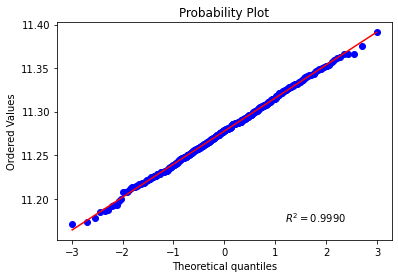

In [30]:
stats.probplot(list(map(np.mean, control_samples)), dist='norm', sparams=(len(control_samples) - 1), plot=plt, rvalue=True)

In [31]:
stats.shapiro(list(map(np.mean, control_samples)))[0]

0.998495876789093

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

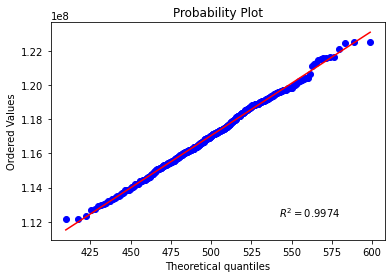

In [32]:
stats.probplot(list(map(lambda x: np.sum((x - np.mean(x)) ** 2), control_samples)), dist='chi2', sparams=(len(control_samples) - 1), plot=plt, rvalue=True)

In [54]:
for _ in control_group['userID'].unique():
    if len(control_group[control_group['userID'] == _]) > 1:
        print('USER_ID:', _)
        print('-----')

USER_ID: 1543
-----
USER_ID: 5701
-----
USER_ID: 6331
-----
USER_ID: 8930
-----
USER_ID: 9409
-----
USER_ID: 10433
-----


KeyboardInterrupt: 

In [64]:
control_group_unique = pd.pivot_table(control_group, columns=['userID'], aggfunc='sum').T
exp_group_unique = pd.pivot_table(exp_group, columns=['userID'], aggfunc='sum').T

In [65]:
stats.mannwhitneyu(control_group_unique.n_clicks, exp_group_unique.n_clicks)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [117]:
#control_group.groupby(['userID']).agg(np.sum) #    так тоже можно

control_browser = control_group.groupby(['browser', 'userID']).agg(np.sum)
exp_browser = exp_group.groupby(['browser', 'userID']).agg(np.sum)
p_array = list()
for browser in raw_data['browser'].unique():
    print(browser, end='|')
    stat_mann, p_mann = stats.mannwhitneyu(control_browser.loc[browser, 'n_clicks'].values, exp_browser.loc[browser, 'n_clicks'].values, alternative='two-sided')
    p_array.append(p_mann)

Browser #2|Browser #4|Browser #14|Browser #17|Browser #20|Browser #22|

In [119]:
p_array

[0.0544877208394482,
 0.8152123531690997,
 0.0,
 0.07480120286021603,
 0.9073331277747075,
 0.5148110304420064]

In [110]:
from statsmodels.sandbox.stats.multicomp import multipletests
np.unique(multipletests(p_array, alpha=.05)[0], return_counts=True)


(array([False,  True]), array([5, 1]))

In [113]:
for browser in raw_data['browser'].unique():
    print(f'CONTROL BROWSER: {browser}', 100 * control_browser.loc[browser, 'n_nonclk_queries'].sum() / control_browser.loc[browser, 'n_queries'].sum())
    print(f'EXP BROWSER: {browser}', 100 * exp_browser.loc[browser, 'n_nonclk_queries'].sum() / exp_browser.loc[browser, 'n_queries'].sum())

#   Изменение только для 14 браузера

CONTROL BROWSER: Browser #2 45.96274717919465
EXP BROWSER: Browser #2 44.982746948554706
CONTROL BROWSER: Browser #4 46.97092963514274
EXP BROWSER: Browser #4 45.14294190358467
CONTROL BROWSER: Browser #14 57.59041136008114
EXP BROWSER: Browser #14 43.755617361273295
CONTROL BROWSER: Browser #17 36.29936674628209
EXP BROWSER: Browser #17 36.93741284866483
CONTROL BROWSER: Browser #20 40.540484743383296
EXP BROWSER: Browser #20 38.97737648371716
CONTROL BROWSER: Browser #22 40.593976593513354
EXP BROWSER: Browser #22 39.85394721969546
